# 1. データの初期確認、性別・年代別集計

## 1.1 データの読み込みと初期確認

### 1.1.1 データの読み込み

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import japanize_matplotlib
import matplotlib.ticker as mtick

In [2]:
# データ読み込み
df = pd.read_csv("../data/customer_shopping_data.csv")

# 先頭の五行確認
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


### 1.1.2 データ構造の確認

In [3]:
# データ型、構造確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [4]:
# 大雑把な統計値把握
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


### 1.1.3 欠損値の確認

In [5]:
# 欠損値確認
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

### 1.1.4 数値列のヒストグラム表示

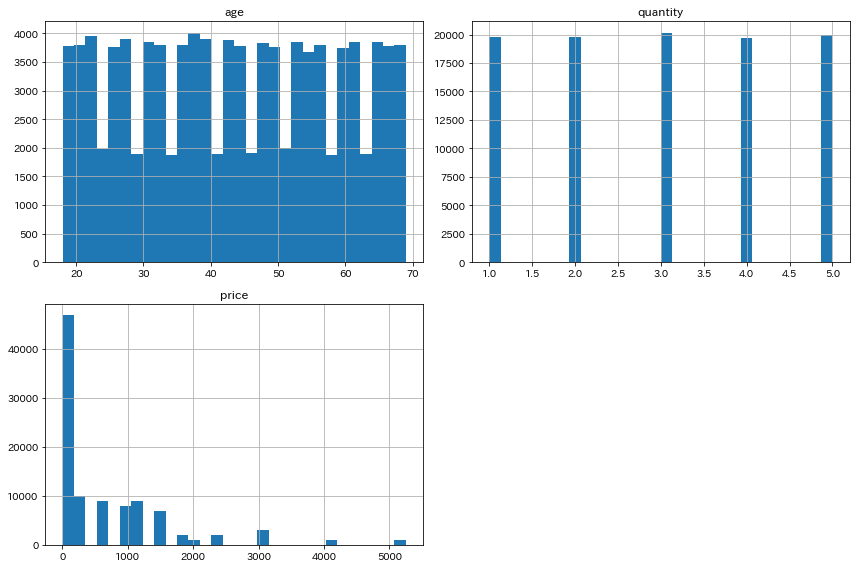

In [6]:
# 数値データのおおまかな分布を調べる
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

## 1.2 日付処理と2022年データの抽出

### 1.2.1 invoice_date の日付型変換

In [7]:
# 「invoice_date」を日付型に変換
df["invoice_date"] = pd.to_datetime(df["invoice_date"], errors="coerce")

### 1.2.2 2022年データの抽出とコピー作成

In [8]:
# 2022年を抽出
df_2022 = df[df["invoice_date"].dt.year == 2022].copy()

### 1.2.3 売上高列(total_amount)の作成

In [9]:
# 売り上げ金額の列を追加
df_2022["total_amount"] = df_2022["price"] * df_2022["quantity"]

### 1.2.4 2022年データの概要を改めて確認

In [10]:
# 2022年のデータの構造や統計値等を改めて確認
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45551 entries, 0 to 99456
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      45551 non-null  object        
 1   customer_id     45551 non-null  object        
 2   gender          45551 non-null  object        
 3   age             45551 non-null  int64         
 4   category        45551 non-null  object        
 5   quantity        45551 non-null  int64         
 6   price           45551 non-null  float64       
 7   payment_method  45551 non-null  object        
 8   invoice_date    45551 non-null  datetime64[ns]
 9   shopping_mall   45551 non-null  object        
 10  total_amount    45551 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 4.2+ MB


In [11]:
df_2022.describe()

,age,quantity,price,total_amount
count,45551.000000,45551.000000,45551.000000,45551.000000
mean,43.400847,3.010845,688.740668,2534.232269
std,14.987844,1.413256,945.084970,4247.054376
min,18.000000,1.000000,5.230000,5.230000
25%,30.000000,2.000000,40.660000,130.750000
50%,43.000000,3.000000,203.300000,600.170000
75%,56.000000,4.000000,1200.320000,2700.720000
max,69.000000,5.000000,5250.000000,26250.000000


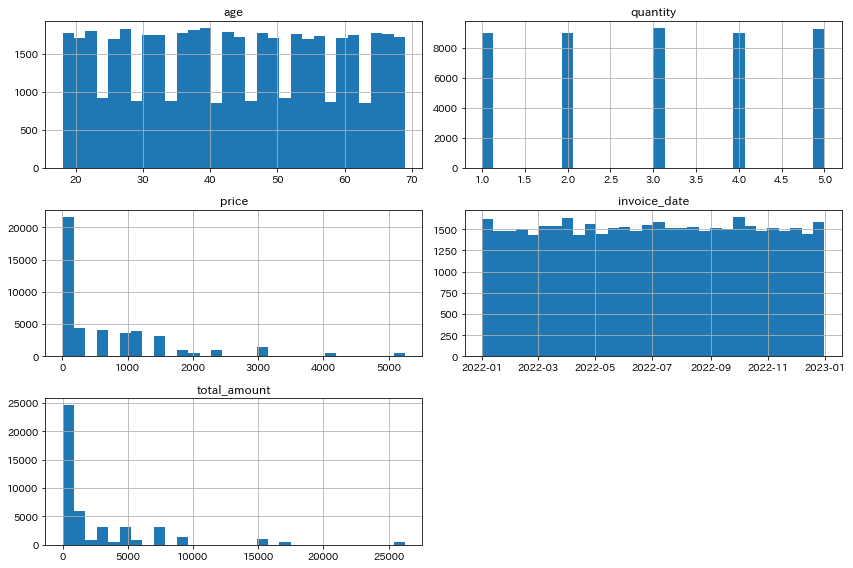

In [12]:
df_2022.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

### 1.2.5 外れ値の初期確認

In [13]:
# 「高額購買」だけを抽出、概要を確認
df_2022[df_2022["total_amount"] > 10000]["total_amount"].describe()

count     1869.000000
mean     18263.384831
std       4680.805983
min      15004.250000
25%      15004.250000
50%      15004.250000
75%      26250.000000
max      26250.000000
Name: total_amount, dtype: float64

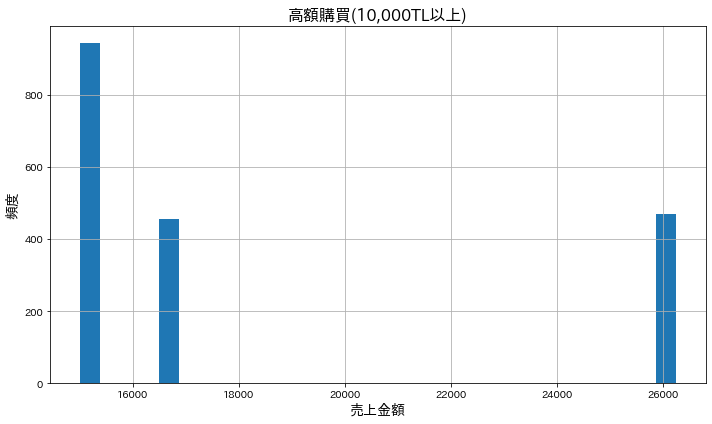

In [14]:
# 高額購買の頻度を視覚的に確認
df_2022[df_2022["total_amount"] > 10000]["total_amount"].hist(figsize=(10, 6), bins=30)
plt.title("高額購買(10,000TL以上)", fontsize=16)
plt.xlabel("売上金額", fontsize=14)
plt.ylabel("頻度", fontsize=14)
plt.tight_layout()
plt.show()

## 1.3 性別×年代別の売上集計を可視化

### 1.3.1 データを年代別にグループ分け

In [15]:
# 年齢を10で区切ったデータの列を新たに追加
df_2022["age_group"] = (df_2022["age"] // 10 * 10).astype(str) + "s"

### 1.3.2 性別×年代別の売上を集計

In [16]:
# 性別・年代別の売上集計
gender_age_sales = df_2022.groupby(["gender", "age_group"])["total_amount"].sum().unstack()
gender_age_sales

age_group,10s,20s,30s,40s,50s,60s
gender,,,,,,
Female,2687785.25,13576974.0,13321867.26,13510577.77,13174306.02,12788365.93
Male,1694387.86,8567587.8,8821034.90,9370266.83,8784787.59,9138872.87


### 1.3.3 2022年のデータを別途保存

In [17]:
# 2022年のみ抽出したデータフレームをcsvファイルで保存
df_2022.to_csv("../data/customer_shopping_data_2022.csv", index=False)

### 1.3.4 棒グラフで可視化・画像を保存

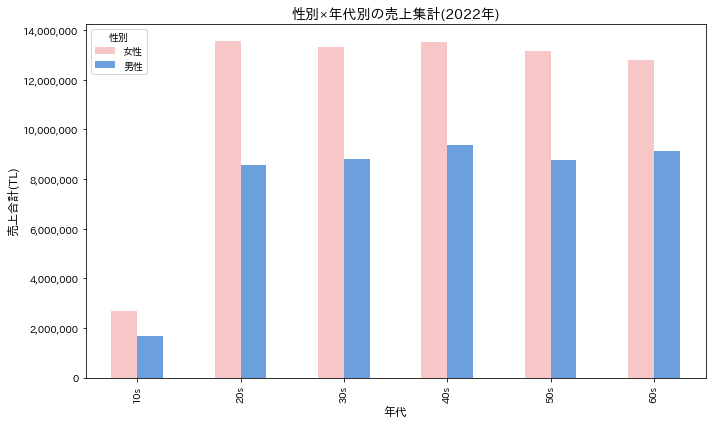

In [18]:
# 棒グラフによる可視化

# カラー設定
colors = {
    "Female": "#f7c6c7", #ベビーピンク
    "Male": "#6ca0dc"    #スカイブルー
}

# 色純を性別の列順に合わせる
color_list = [colors[gender] for gender in gender_age_sales.index]


fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
gender_age_sales.T.plot(kind="bar", ax=ax, color=color_list)

# タイトル・軸ラベル
ax.set_title("性別×年代別の売上集計(2022年)", fontsize=14)
ax.set_xlabel("年代", fontsize=12)
ax.set_ylabel("売上合計(TL)", fontsize=12)

# Y軸をカンマ区切りに
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))

# 凡例の日本語ラベル定義
japanese_labels = ["女性", "男性"]
#凡例を上書き
ax.legend(labels=japanese_labels, title="性別")

# グラフ画像を保存して描画
plt.tight_layout()
plt.savefig("../output/01_gender_age_sales_2022.png", dpi=300, bbox_inches="tight")
plt.show()

## 性別 × 年代別の売上集計（2022年）

このセクションでは、2022年における性別（女性・男性）と年代（10代〜50代以上）ごとの売上傾向を集計・可視化した。

- データ集計は `df_2022.groupby(["gender", "age_group"])["total_amount"].sum()` により実施
- 年代は 10歳刻み（例：20s, 30s）で分類
- グラフは棒グラフ形式で可視化し、性別ごとに色分け（女性：淡いピンク、男性：スカイブルー）
- 売上合計は y軸にカンマ区切りで表示し、凡例も日本語に変更

###  考察メモ

- **全ての年代において、男性よりも女性の方が明らかに売り上げが高い**
- 10代の顧客による購買は少なく、20代以降はどの年代も大きな差異は見られない。

###  保存ファイル
- グラフ画像は `output/gender_age_sales_2022.png` に保存済み
